<a href="https://colab.research.google.com/github/samniu/machine-learning-with-python/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [15]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2025-01-03 20:18:20--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.2’

cats_and_dogs.zip.2 100%[===================>]  67.43M   224MB/s    in 0.3s    

2025-01-03 20:18:21 (224 MB/s) - ‘cats_and_dogs.zip.2’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [16]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH,
                                                     classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         shuffle=False,)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


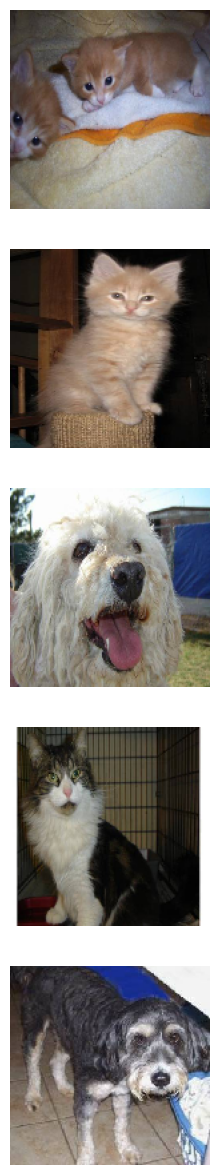

In [17]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [18]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.2,
                                    height_shift_range=.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest'
                                   )

# (
#         rescale=1./255,
#         rotation_range=45,
#         width_shift_range=.15,
#         height_shift_range=.15,
#         shear_range=.15,
#         zoom_range=.15,
#         horizontal_flip=True,
#         fill_mode='nearest')


Found 2000 images belonging to 2 classes.


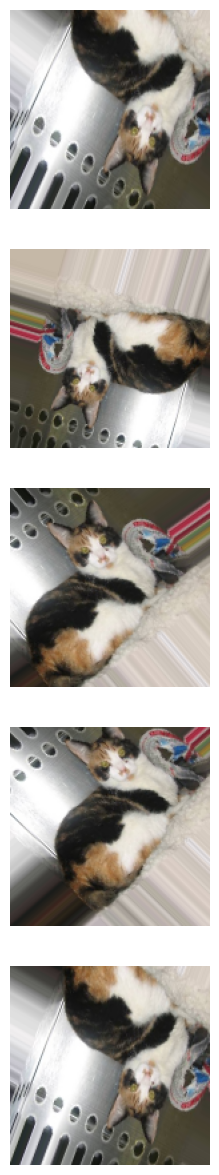

In [19]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [20]:
# 7
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.applications import VGG16

# base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
# base_model.trainable = False  # Freeze the base model layers

model = Sequential(
    [

        Conv2D(32, (3,3), activation='relu',input_shape=(150, 150, 3)),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        # base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]
)

# optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,563,713 (36.48 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 8
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.4887 - loss: 1.0719 - val_accuracy: 0.5033 - val_loss: 0.6930
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:43 7s/step - accuracy: 0.4922 - loss: 0.6944

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4922 - loss: 0.6944 - val_accuracy: 0.4712 - val_loss: 0.6932
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 126s 8s/step - accuracy: 0.5206 - loss: 0.6918 - val_accuracy: 0.5033 - val_loss: 0.6849
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.5391 - loss: 0.6937 - val_accuracy: 0.4808 - val_loss: 0.6903
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 126s 8s/step - accuracy: 0.4910 - loss: 0.6971 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.3828 - loss: 0.6991 - val_accuracy: 0.4904 - val_loss: 0.6934
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.4837 - loss: 0.6937 - val_accuracy: 0.5759 - val_loss: 0.6912
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4688 - loss: 0.6901 - val_accuracy: 0.6923 - val_loss: 0.6904
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.5010 - loss: 0.6905 - val_accuracy: 0.5580 - val_loss:

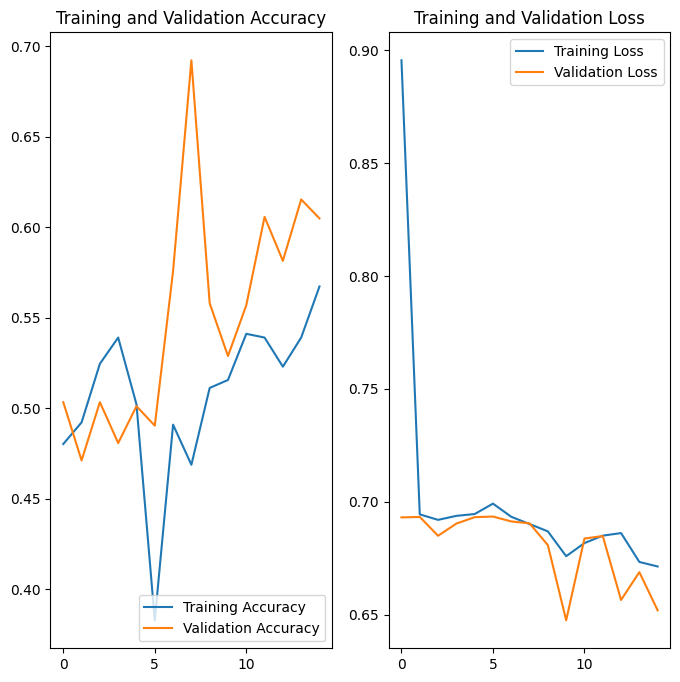

In [22]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


<ipython-input-23-2e00f6ff09b3>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_labels[int(prob > 0.6)] for prob in probabilities]


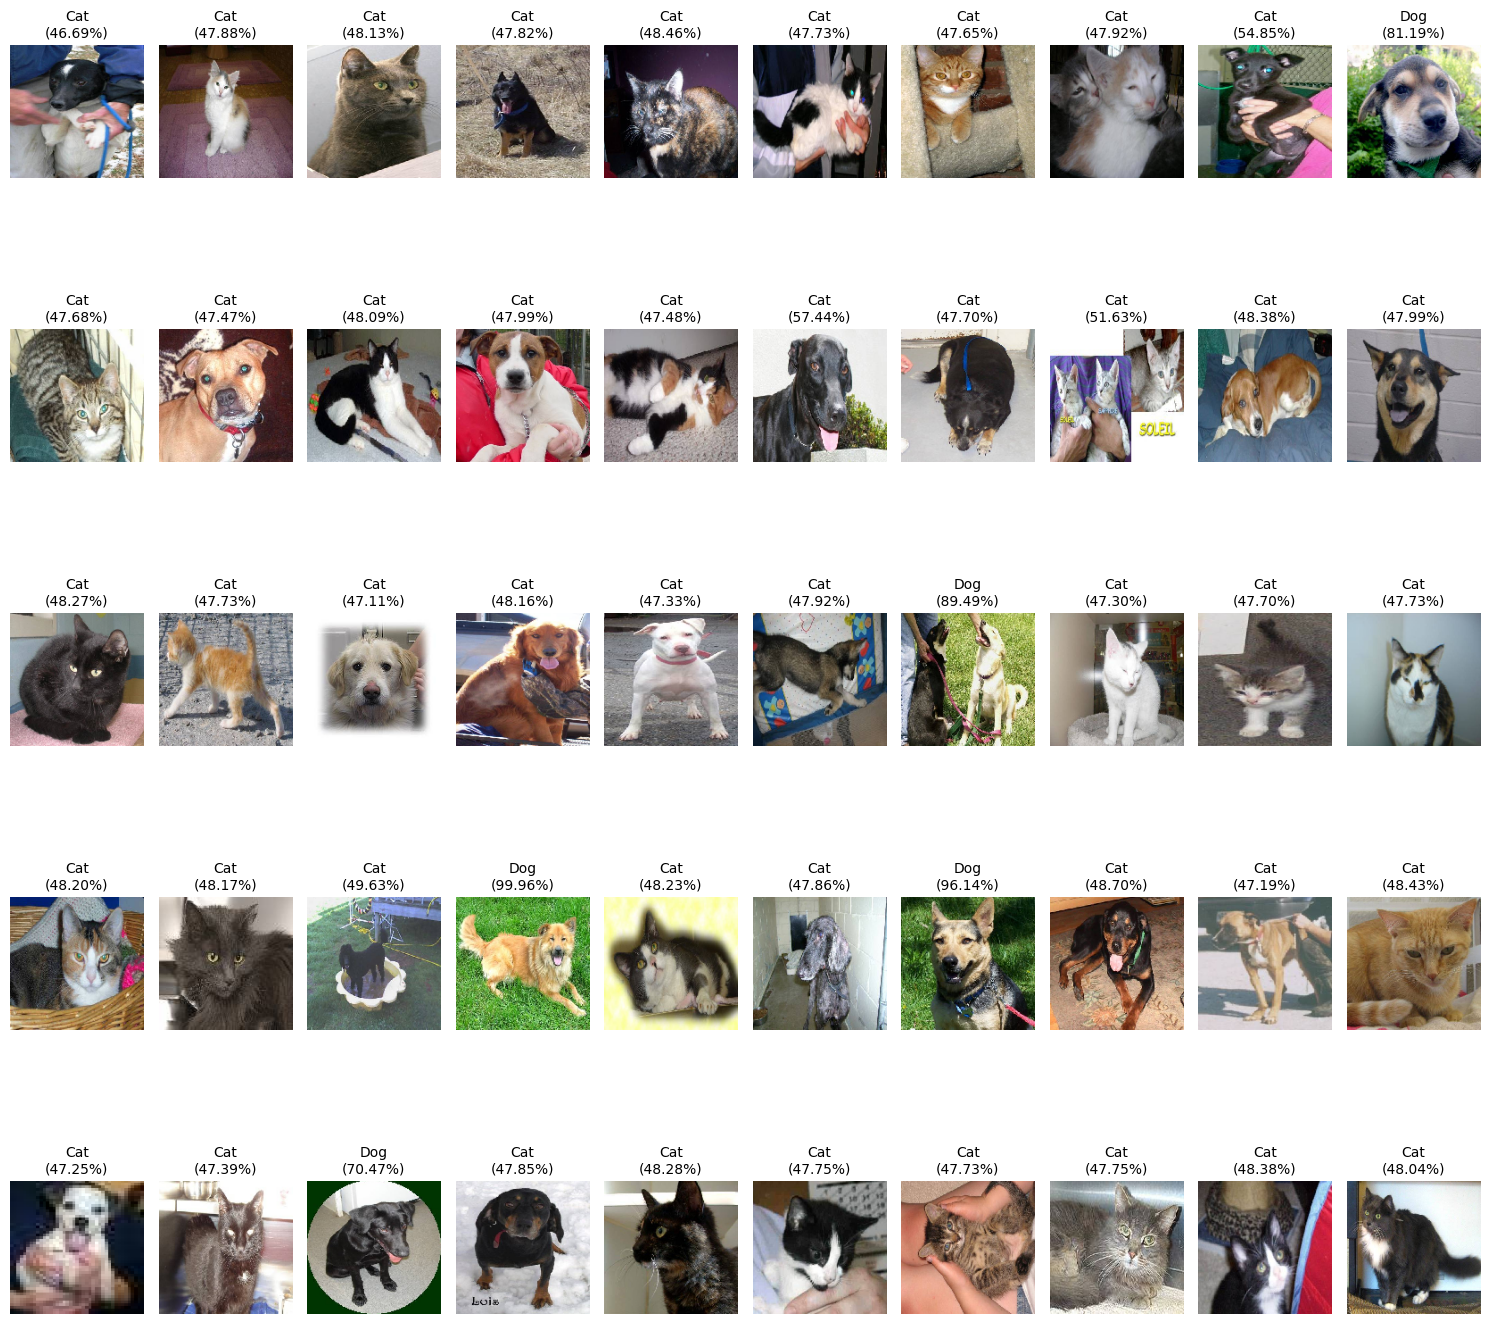

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for test images
test_data_gen.reset()  # Ensure the generator starts from the first batch
probabilities = model.predict(test_data_gen)

# Convert probabilities to class labels
# If probability > 0.6, it's a Dog; otherwise, it's a Cat
class_labels = ['Cat', 'Dog']
predicted_classes = [class_labels[int(prob > 0.6)] for prob in probabilities]

# Function to plot images with labels and probabilities
def plotImages(images, labels, probabilities):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i])
        plt.title(f"{labels[i]}\n({probabilities[i]:.2f}%)", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get test images and their true labels
test_images, true_labels = next(test_data_gen)

# Normalize probabilities to percentages
probabilities_percentage = (probabilities * 100).flatten()

# Plot the images with labels and probabilities
plotImages(test_images, predicted_classes[:len(test_images)], probabilities_percentage[:len(test_images)])

In [24]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability[0]) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
